### Sequential

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(784, )))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

### functional

In [ ]:
input_tensor = layers.Input(shape=(784, ))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation='softmax')(x)
model = models.Model(inputs=input_tensor, outputs=output_tensor)
model.summary()

### optimizer

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='mse', metrics=['accuracy'])

### IMDB

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
max([max(sequence) for sequence in train_data])

In [ ]:
word_index = imdb.get_word_index()

In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [ ]:
decoded_review

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): # sequences是index
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#### 自定義

In [71]:
x_val = x_train[:10000]
p_x_train = x_train[10000:]
y_val = y_train[:10000]
p_y_train = y_train[10000:]

In [73]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(p_x_train, p_y_train, epochs=10, batch_size=256, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 3s 170us/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0164 - val_accuracy: 0.9962
Epoch 2/10
15000/15000 [==============================] - 2s 156us/step - loss: 7.5245e-06 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9966
Epoch 3/10
15000/15000 [==============================] - 2s 156us/step - loss: 4.3470e-04 - accuracy: 0.9999 - val_loss: 0.0257 - val_accuracy: 0.9938
Epoch 4/10
15000/15000 [==============================] - 2s 156us/step - loss: 3.1203e-06 - accuracy: 1.0000 - val_loss: 0.0177 - val_accuracy: 0.9959
Epoch 5/10
15000/15000 [==============================] - 2s 155us/step - loss: 1.7320e-06 - accuracy: 1.0000 - val_loss: 0.0184 - val_accuracy: 0.9954
Epoch 6/10
15000/15000 [==============================] - 2s 157us/step - loss: 4.7986e-04 - accuracy: 0.9998 - val_loss: 0.0236 - val_accuracy: 0.9939
Epoch 7/10
15000/15000 [==================

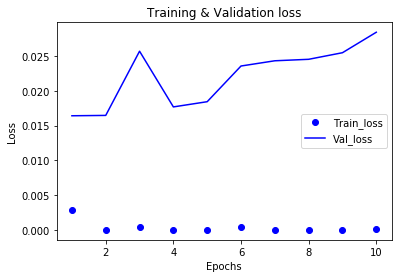

In [74]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Train_loss")
plt.plot(epochs, val_loss, 'b', label="Val_loss")
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

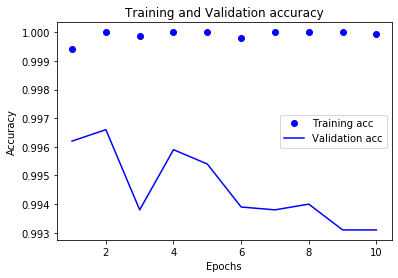

In [75]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
model.predict(x_test)

array([[2.9802322e-08],
       [1.0000000e+00],
       [1.0000000e+00],
       ...,
       [3.1447411e-04],
       [7.9631805e-05],
       [9.9826217e-01]], dtype=float32)

### 多分類

In [78]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [85]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [87]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [88]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [92]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
oh_train_labels = to_one_hot(train_labels)
oh_test_labels = to_one_hot(test_labels)

#### 另

In [93]:
from keras.utils.np_utils import to_categorical

oh_train_labels = to_categorical(train_labels)
oh_test_labels = to_categorical(test_labels)

In [95]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_15 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])
x_val = x_train[:1000]
p_x_train = x_train[1000:]
y_val = oh_train_labels[:1000]
p_y_train = oh_train_labels[1000:]

In [97]:
history = model.fit(p_x_train, p_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 155us/step - loss: 2.7357 - accuracy: 0.5159 - val_loss: 1.7975 - val_accuracy: 0.6250
Epoch 2/20
7982/7982 [==============================] - 1s 98us/step - loss: 1.4547 - accuracy: 0.7043 - val_loss: 1.3168 - val_accuracy: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 97us/step - loss: 1.0539 - accuracy: 0.7836 - val_loss: 1.1348 - val_accuracy: 0.7600
Epoch 4/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.8203 - accuracy: 0.8292 - val_loss: 1.0245 - val_accuracy: 0.7910
Epoch 5/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.6447 - accuracy: 0.8651 - val_loss: 0.9747 - val_accuracy: 0.7990
Epoch 6/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.5077 - accuracy: 0.8960 - val_loss: 0.9467 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.41

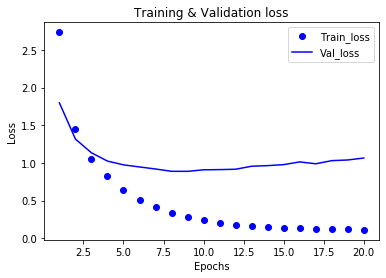

In [98]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label="Train_loss")
plt.plot(epochs, val_loss, 'b', label="Val_loss")
plt.title("Training & Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

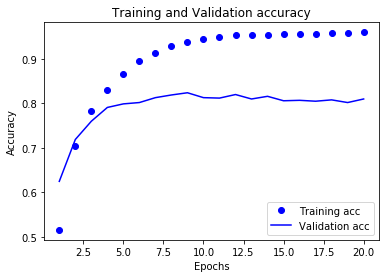

In [99]:
plt.clf()

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [100]:
history = model.fit(p_x_train, p_y_train, epochs=9
                    , batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 106us/step - loss: 0.1098 - accuracy: 0.9569 - val_loss: 1.0721 - val_accuracy: 0.8090
Epoch 2/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1062 - accuracy: 0.9594 - val_loss: 1.1464 - val_accuracy: 0.8030
Epoch 3/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1021 - accuracy: 0.9590 - val_loss: 1.0928 - val_accuracy: 0.8020
Epoch 4/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.1023 - accuracy: 0.9568 - val_loss: 1.2202 - val_accuracy: 0.7900
Epoch 5/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1022 - accuracy: 0.9558 - val_loss: 1.1226 - val_accuracy: 0.7960
Epoch 6/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1033 - accuracy: 0.9570 - val_loss: 1.1756 - val_accuracy: 0.7970
Epoch 7/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.1006 - ac

In [103]:
model.evaluate(x_test, oh_test_labels)

2246/2246 [==============================] - 0s 156us/step


[1.368078126083605, 0.7809438705444336]

In [114]:
pred = model.predict(x_test)

In [115]:
np.sum(pred[0])

1.0

In [116]:
pred.shape

(2246, 46)

In [117]:
np.argmax(pred[0])

3

#### sparse_categorical_crossentropy(將oh轉換成整數的張量)

### Regression

In [131]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

#### 將不同類型或單位的數值直接輸入NN會有問題，因此必須對資料先做正規化

In [132]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data -= std

In [133]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # 這個沒有啟動層 代表就是線性層(回歸)
    return model

### K-Fold CV

In [135]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i*num_val_samples:(i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [137]:
np.mean(all_scores)

2.481079399585724

In [143]:
num_epochs = 500
k = 4
num_val_samples = len(train_data) // k
all_mae_histories = []

for i in range(k):
    print("processing fold #", i)
    val_data = train_data[i*num_val_samples:(i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


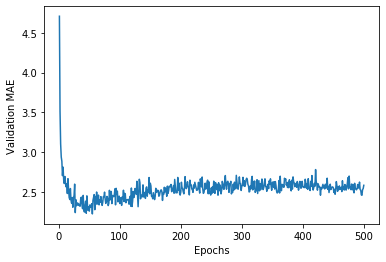

In [147]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

#### EMA

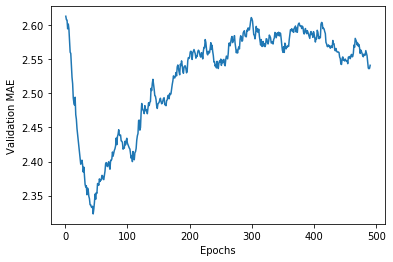

In [152]:
def smooth_curve(points, factor=.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [153]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size = 16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 215us/step


In [154]:
test_mae_score

1116.231689453125